In [108]:
# 📌 Phase 1: Load Dataset & Initial Overview

import pandas as pd
import numpy as np
# Load the Superstore dataset
df = pd.read_csv('Sample - Superstore.csv',encoding="latin1")

# Basic structure
print("Shape of data:", df.shape)
print("\nColumn names:", df.columns.tolist())

# Sample rows
df.head()

Shape of data: (9994, 21)

Column names: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [109]:
df.columns=df.columns.str.strip() # Remove leading/trailing spaces means ' Order ID ', to 'Order ID'
df.columns=df.columns.str.lower() # Convert to lower case
df.columns

Index(['row id', 'order id', 'order date', 'ship date', 'ship mode',
       'customer id', 'customer name', 'segment', 'country', 'city', 'state',
       'postal code', 'region', 'product id', 'category', 'sub-category',
       'product name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [110]:
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [111]:
df.columns.tolist()

['row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'country',
 'city',
 'state',
 'postal_code',
 'region',
 'product_id',
 'category',
 'sub-category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit']

# Missing values

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  sub-category   9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

In [113]:
df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

# To see the only columns with null values

In [114]:
df.isnull().sum()[df.isnull().sum() > 0]


Series([], dtype: int64)

<Axes: >

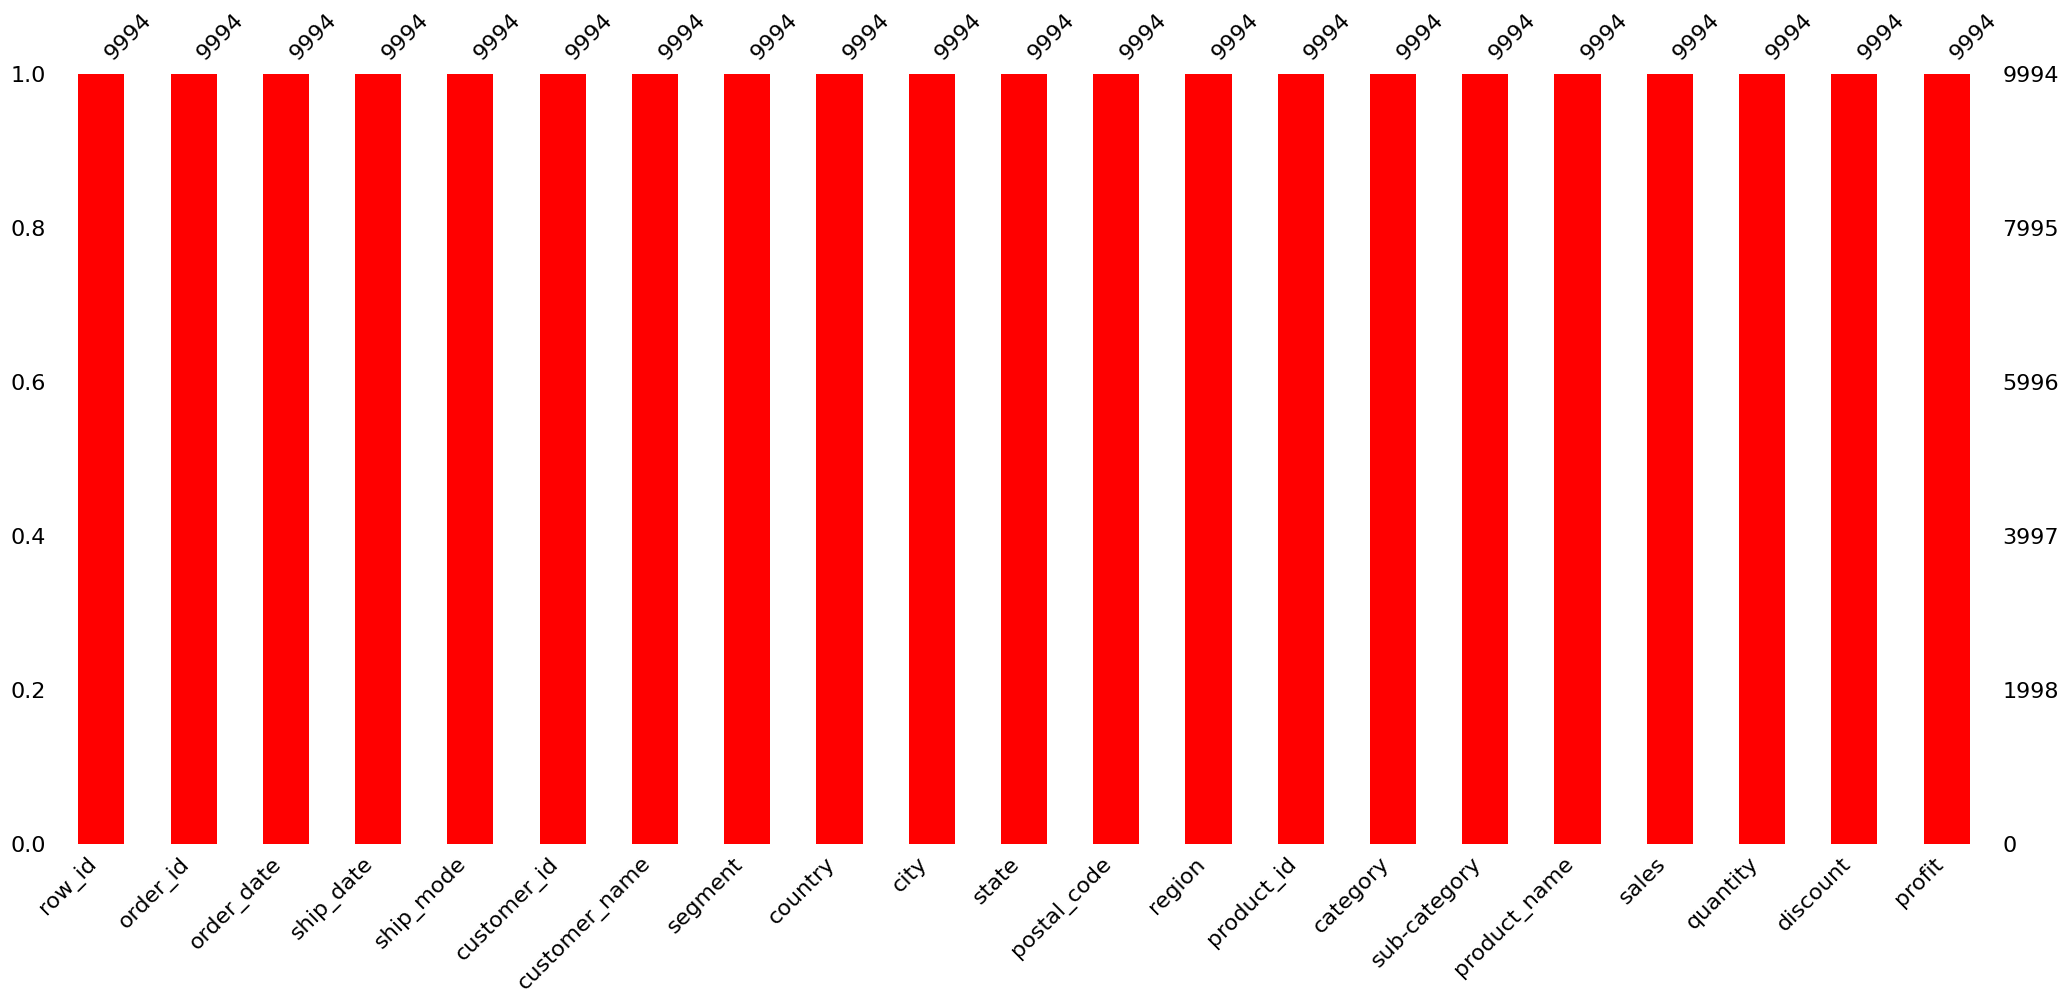

In [115]:
import missingno as msno
msno.bar(df,color="red")


In [116]:
df["order_date"]=pd.to_datetime(df['order_date'],errors='coerce')
df["ship_date"]=pd.to_datetime(df['ship_date'],errors='coerce')


In [117]:
df.isnull().sum()

row_id              0
order_id            0
order_date       5952
ship_date        6096
ship_mode           0
customer_id         0
customer_name       0
segment             0
country             0
city                0
state               0
postal_code         0
region              0
product_id          0
category            0
sub-category        0
product_name        0
sales               0
quantity            0
discount            0
profit              0
dtype: int64

In [118]:
# Step 1: Define common missing value patterns
custom_missing = ['#####', 'NA', 'N/A', 'null', 'None', '', ' ', '?', '--', 'Missing']

# Step 2: Select object (string) columns only
obj_cols = df.select_dtypes(include='object').columns

# Step 3: Check each column for fake missing values
for col in obj_cols:
    mask = df[col].astype(str).str.strip().isin(custom_missing)
    count = mask.sum()
    if count > 0:
        print(f"⚠️ Column '{col}' has {count} suspicious missing values.")


In [119]:
df[obj_cols].isnull().sum()

order_id         0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
region           0
product_id       0
category         0
sub-category     0
product_name     0
dtype: int64

In [120]:
df[obj_cols] = df[obj_cols].replace(custom_missing, np.nan)


In [121]:
df[obj_cols].isnull().sum()

order_id         0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
region           0
product_id       0
category         0
sub-category     0
product_name     0
dtype: int64

In [122]:
# Calculate shipping delay in days (ship_date - order_date)
df['shipping_delay'] = (df['ship_date'] - df['order_date']).dt.days

# Check stats and missing
print(df['shipping_delay'].describe())
print(df['shipping_delay'].isnull().sum())


count    2739.000000
mean        3.512596
std         1.771076
min         0.000000
25%         2.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: shipping_delay, dtype: float64
7255


In [123]:
type(df["shipping_delay"])

pandas.core.series.Series

In [124]:
median_delay=int(df["shipping_delay"].median()) #meadian will be a float but we need to add that median in date which is int so we convert that into int


In [125]:
median_delay

4

In [126]:
# Optional: Fill missing order_date with previous non-null
df['order_date'] = df['order_date'].fillna(method='ffill')  # Forward fill


C:\Users\HP\AppData\Local\Temp\ipykernel_15752\4256465721.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['order_date'] = df['order_date'].fillna(method='ffill')  # Forward fill


In [127]:
fill_dates=df["order_date"]+pd.to_timedelta(median_delay,unit='d') #adding median delay to order date

In [128]:
df["ship_date"]=df["ship_date"].fillna(fill_dates)

In [129]:
df["ship_date"].isnull().sum()

np.int64(0)

In [130]:
# Step 4: Recalculate shipping_delay after filling
df['shipping_delay'] = (df['ship_date'] - df['order_date'])
df["shipping_delay"]

0         3 days
1         3 days
2         4 days
3         4 days
4         4 days
          ...   
9989      4 days
9990   -153 days
9991   -153 days
9992   -153 days
9993      5 days
Name: shipping_delay, Length: 9994, dtype: timedelta64[ns]

In [131]:
(df['shipping_delay'].dt.days < 0).sum()


np.int64(608)

In [132]:
# as we see 

In [133]:
print(df['shipping_delay'].isnull().sum())  # 0 hona chahiye


0


In [134]:
df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_delay
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4 days
3,4,US-2015-108966,2015-10-11,2015-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,4 days
4,5,US-2015-108966,2015-10-11,2015-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2017-08-03,2017-08-07,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,4 days
9990,9991,CA-2017-121258,2017-08-03,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,-153 days
9991,9992,CA-2017-121258,2017-08-03,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,-153 days
9992,9993,CA-2017-121258,2017-08-03,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,-153 days


In [135]:
# Drop negative delays safely using .dt.days
df = df[df['shipping_delay'].dt.days >= 0].copy()

# Update column to pure days integer (if needed for modeling later)
df['shipping_delay'] = df['shipping_delay'].dt.days

# Confirm
print("📦 Negative delays left:", (df['shipping_delay'] < 0).sum())
print("✅ Shape after cleaning:", df.shape)


📦 Negative delays left: 0
✅ Shape after cleaning: (9386, 22)


In [136]:
print(df['shipping_delay'].describe())


count    9386.000000
mean       32.392180
std       144.687772
min         0.000000
25%         4.000000
50%         4.000000
75%         4.000000
max      1372.000000
Name: shipping_delay, dtype: float64


If shipping_delay goes from 0 to 10 days, and bins=5, the x-axis will be split like this:

Bin Range	Count

0-2	        50

2-4	        120

4-6	90

6-8	20

8-10	10

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


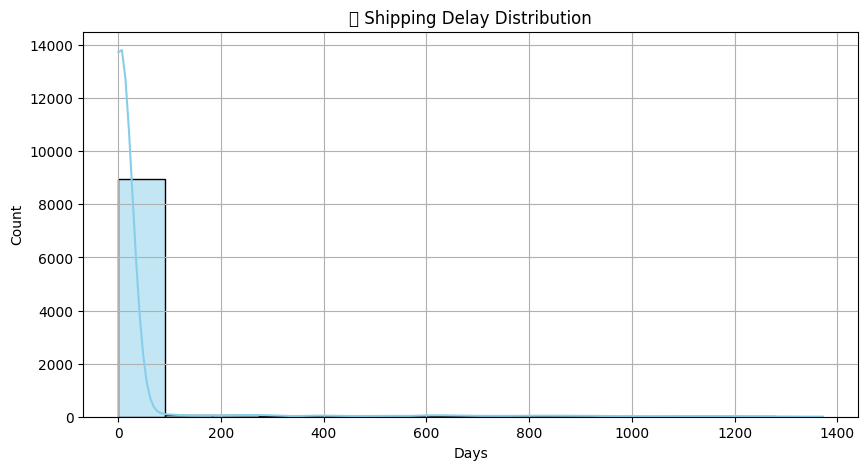

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['shipping_delay'], bins=15, kde=True, color='skyblue')
plt.title('⏱️ Shipping Delay Distribution')
plt.xlabel('Days')
plt.ylabel('Count')
plt.grid(True)
plt.show()


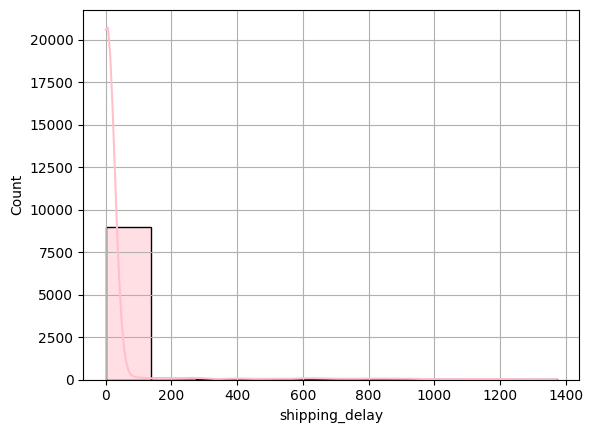

In [138]:
sns.histplot(df["shipping_delay"],bins=10,kde=True,color='pink')
plt.grid(True)

C:\Users\HP\AppData\Local\Temp\ipykernel_15752\2376012257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ship_mode', y='shipping_delay', data=df, palette='pastel')
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


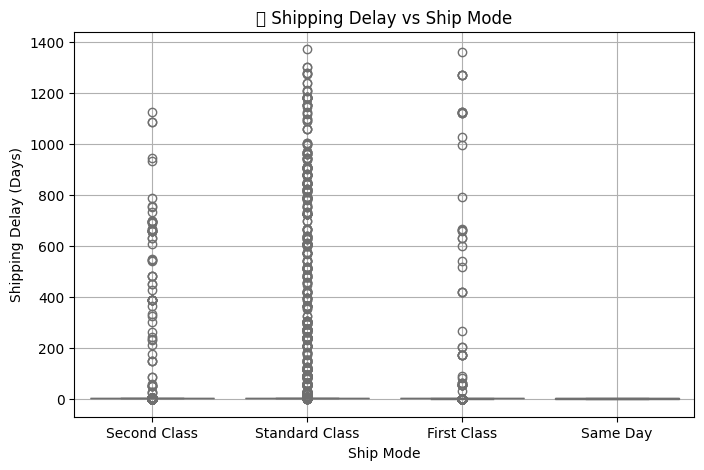

In [139]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='ship_mode', y='shipping_delay', data=df, palette='pastel')
plt.title('📦 Shipping Delay vs Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Shipping Delay (Days)')
plt.grid(True)
plt.show()

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


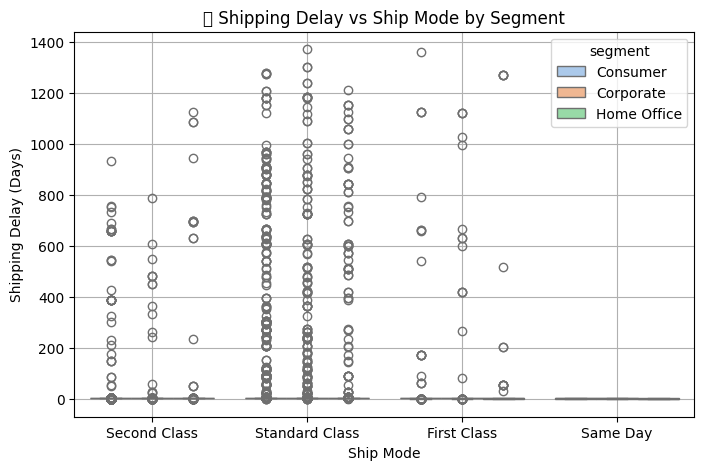

In [140]:
# by me for experimentation
plt.figure(figsize=(8, 5))
sns.boxplot(data=df,x="ship_mode",y="shipping_delay",hue="segment",palette="pastel")
plt.title('📦 Shipping Delay vs Ship Mode by Segment')
plt.xlabel('Ship Mode')
plt.ylabel('Shipping Delay (Days)')
plt.grid(True)
plt.show()

In [141]:
# Step 1: Group by segment and take mean delay
segment_delay = df.groupby('segment')['shipping_delay'].mean().sort_values(ascending=False)
print(segment_delay) # as you can see it has two columns one is segment and other is shipping delay, so we use index function(it will tell categorical_value) and value function(it will tell numerical value) to get the values of segment and shipping delay

segment
Home Office    36.993537
Corporate      32.502141
Consumer       30.724908
Name: shipping_delay, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_15752\170589713.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_delay.index, y=segment_delay.values, palette='viridis')
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


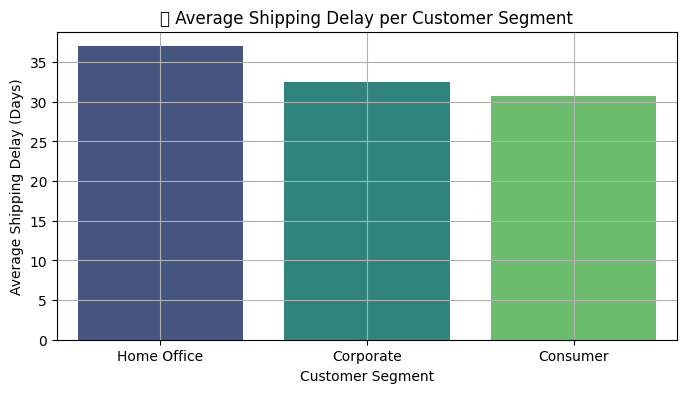

In [142]:

# Step 2: Visualize
plt.figure(figsize=(8, 4))
sns.barplot(x=segment_delay.index, y=segment_delay.values, palette='viridis')
plt.title("📊 Average Shipping Delay per Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Shipping Delay (Days)")
plt.grid(True)
plt.show()


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


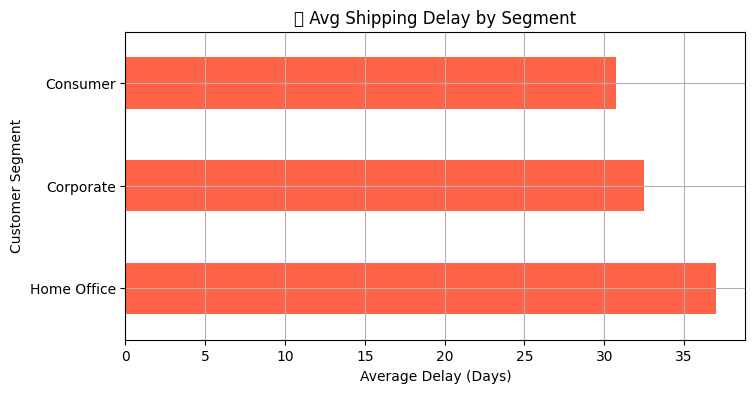

In [143]:
plt.figure(figsize=(8, 4))
segment_delay.plot(kind='barh', color='tomato')
plt.title("📦 Avg Shipping Delay by Segment")
plt.xlabel("Average Delay (Days)")
plt.ylabel("Customer Segment")
plt.grid(True)
plt.show()


In [144]:
category_delay=df.groupby("category")["shipping_delay"].mean().sort_values(ascending=False)
print(category_delay)

category
Furniture          36.756513
Office Supplies    31.456025
Technology         30.424957
Name: shipping_delay, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_15752\4286416094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_delay.index,y=category_delay.values,palette="viridis",legend=False)


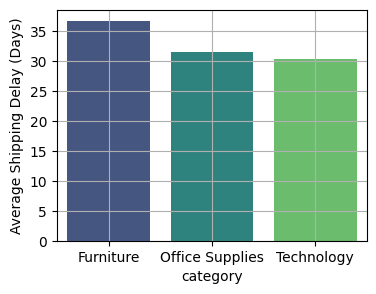

In [145]:
plt.figure(figsize=(4,3)) # it means 
sns.barplot(x=category_delay.index,y=category_delay.values,palette="viridis",legend=False)
plt.grid(True)
plt.xlabel("category")
plt.ylabel("Average Shipping Delay (Days)")
plt.show()

In [146]:
region_delay = df.groupby('region')['shipping_delay'].mean().sort_values(ascending=False)
print(region_delay)


region
Central    42.306642
West       31.007002
East       28.685019
South      27.296906
Name: shipping_delay, dtype: float64


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


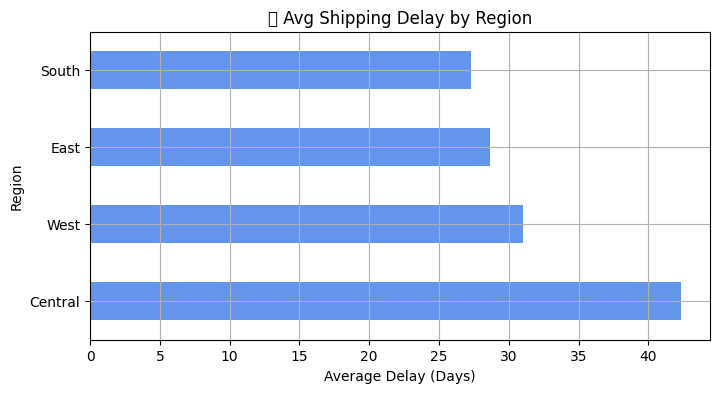

In [147]:
plt.figure(figsize=(8, 4))
region_delay.plot(kind='barh', color='cornflowerblue')
plt.title("🗺️ Avg Shipping Delay by Region")
plt.xlabel("Average Delay (Days)")
plt.ylabel("Region")
plt.grid(True)
plt.show()


In [148]:
# Step: Top 10 Cities with Highest Average Shipping Delay
city_delay = df.groupby('city')['shipping_delay'].mean().sort_values(ascending=False).head(10)

# Display result
print(city_delay)


city
Tigard              692.800000
Champaign           579.000000
Lodi                501.000000
Mount Vernon        429.333333
Sanford             397.000000
Mission Viejo       336.500000
Reno                306.500000
Quincy              292.222222
Holland             282.000000
Sterling Heights    264.333333
Name: shipping_delay, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_15752\846392095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_delay.values, y=city_delay.index, palette='coolwarm')
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


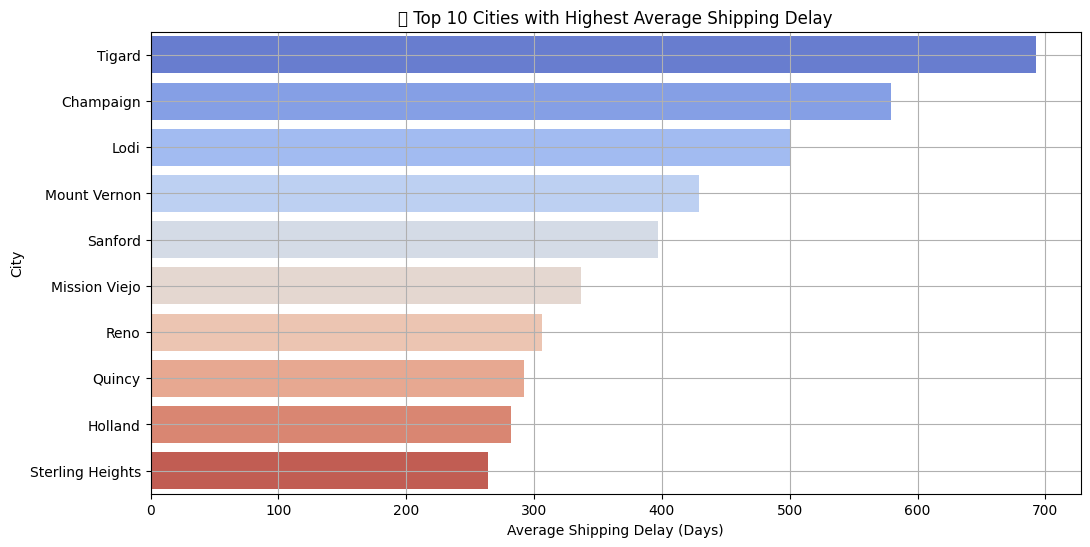

In [149]:
plt.figure(figsize=(12, 6))
sns.barplot(x=city_delay.values, y=city_delay.index, palette='coolwarm')
plt.title('🏙️ Top 10 Cities with Highest Average Shipping Delay')
plt.xlabel('Average Shipping Delay (Days)')
plt.ylabel('City')
plt.grid(True)
plt.show()


In [150]:
city_delay = df.groupby('city')['shipping_delay'].mean().sort_values(ascending=False)
top10_city_delay = city_delay.head(10)
print(top10_city_delay)


city
Tigard              692.800000
Champaign           579.000000
Lodi                501.000000
Mount Vernon        429.333333
Sanford             397.000000
Mission Viejo       336.500000
Reno                306.500000
Quincy              292.222222
Holland             282.000000
Sterling Heights    264.333333
Name: shipping_delay, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_15752\2087163016.py:8: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


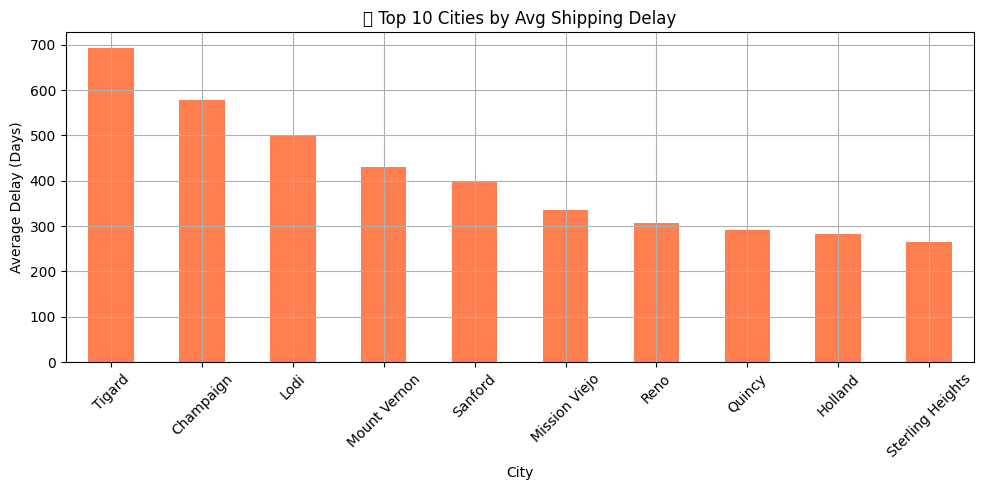

In [151]:
plt.figure(figsize=(10, 5))
top10_city_delay.plot(kind='bar', color='coral')
plt.title("🏙️ Top 10 Cities by Avg Shipping Delay")
plt.xlabel("City")
plt.ylabel("Average Delay (Days)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


category
Furniture          36.756513
Office Supplies    31.456025
Technology         30.424957
Name: shipping_delay, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_15752\2908739565.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


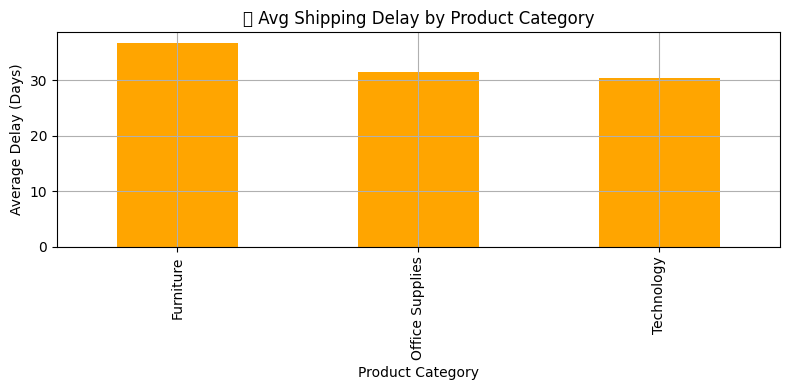

In [152]:
category_delay = df.groupby('category')['shipping_delay'].mean().sort_values(ascending=False)
print(category_delay)
plt.figure(figsize=(8, 4))
category_delay.plot(kind='bar', color='orange')
plt.title("📦 Avg Shipping Delay by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Delay (Days)")
plt.grid(True)
plt.tight_layout()
plt.show()


# 🔍 Outlier Detection & Treatment — (EDA Part)

In [153]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("📊 Numerical Columns:", list(num_cols))


📊 Numerical Columns: ['row_id', 'postal_code', 'sales', 'quantity', 'discount', 'profit', 'shipping_delay']


C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3742174256.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3742174256.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3742174256.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3742174256.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3742174256.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15752\3742174256.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_15752

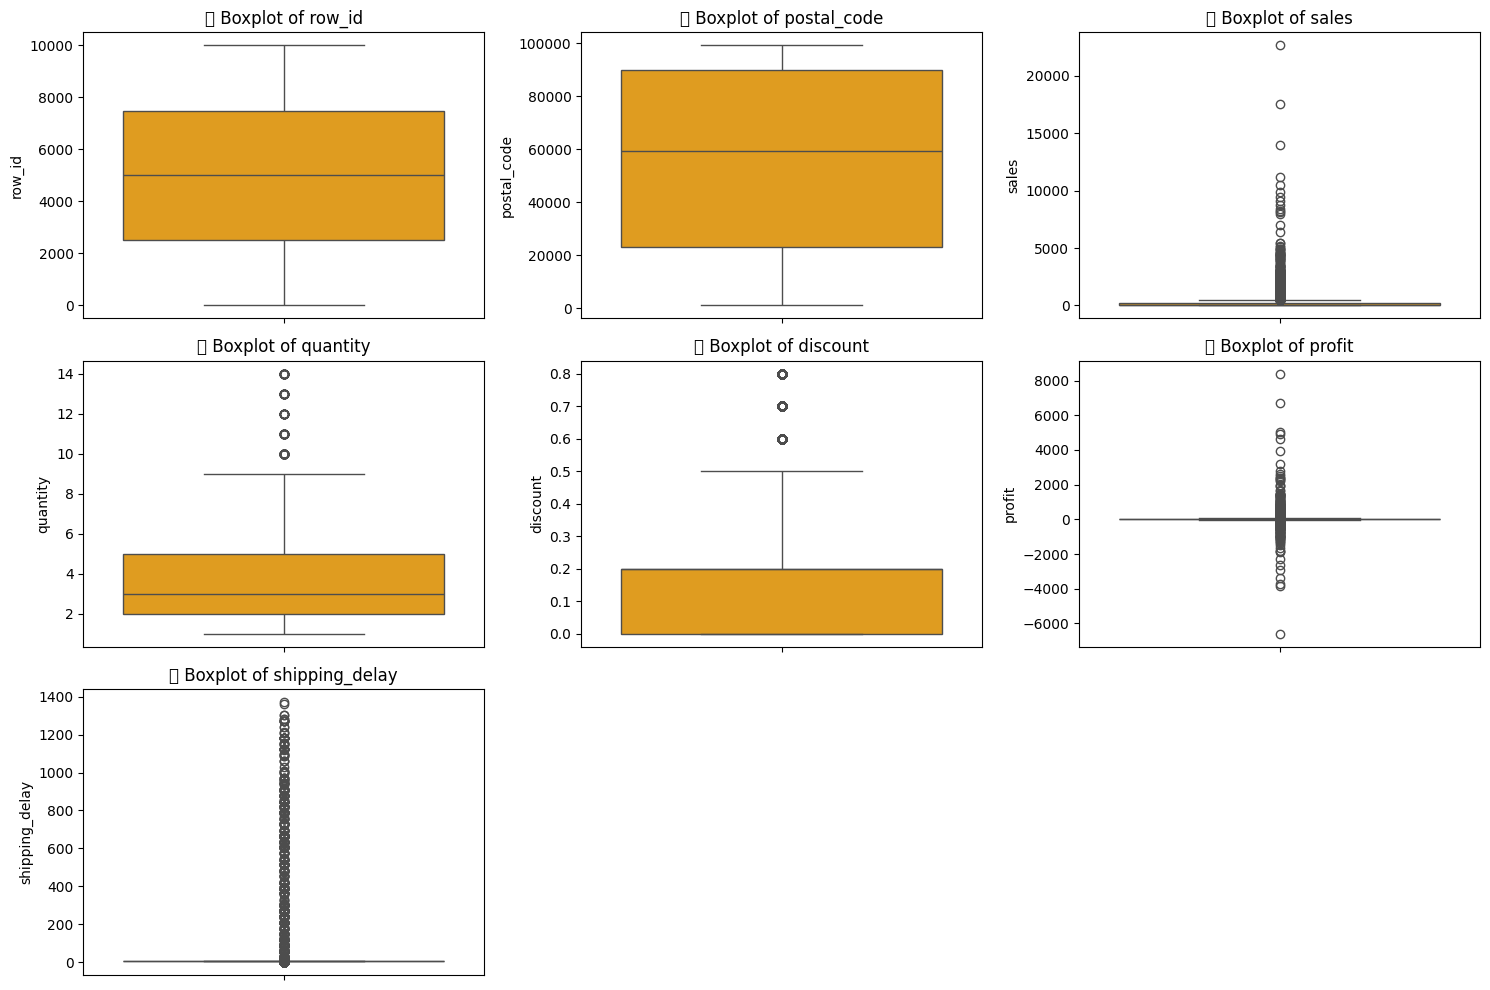

In [154]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  # 3 rows x 3 columns = max 9 plots
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'📦 Boxplot of {col}')
    plt.tight_layout()


# Industry standard to find outlier

In [155]:
Q1 = df['shipping_delay'].quantile(0.25)
Q3 = df['shipping_delay'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

outliers = df[(df['shipping_delay'] < lower_limit) | (df['shipping_delay'] > upper_limit)]
print("🚨 Outliers in shipping_delay:", outliers.shape[0])


🚨 Outliers in shipping_delay: 2498


Why 1.5 * IQR?

Ye value Tukey's Boxplot Rule se inspired hai (a standard in statistics).

1.5 ek heuristic hai — not fixed by any law.

Tu ise change bhi kar sakta hai:

1.5 for mild outliers

3.0 for extreme outliers



# Removal of outliers

In [156]:
df_cleaned = df[(df['shipping_delay'] >= lower_limit) & (df['shipping_delay'] <= upper_limit)]
print("✅ New shape after removing shipping_delay outliers:", df.shape)


✅ New shape after removing shipping_delay outliers: (9386, 22)


In [157]:
pivot_table = df_cleaned.pivot_table(index='category', values='shipping_delay', aggfunc='mean')
print("📊 Average Shipping Delay by Category:\n", pivot_table)


📊 Average Shipping Delay by Category:
                  shipping_delay
category                       
Furniture                   4.0
Office Supplies             4.0
Technology                  4.0


All three categories have an equal average shipping delay of 4.0 days.
This indicates:

1. The company's shipping strategy is consistent across categories.

2. No single product type is causing longer or shorter delays.

3. Shipping performance is uniform, which is generally a good operational signal.



C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


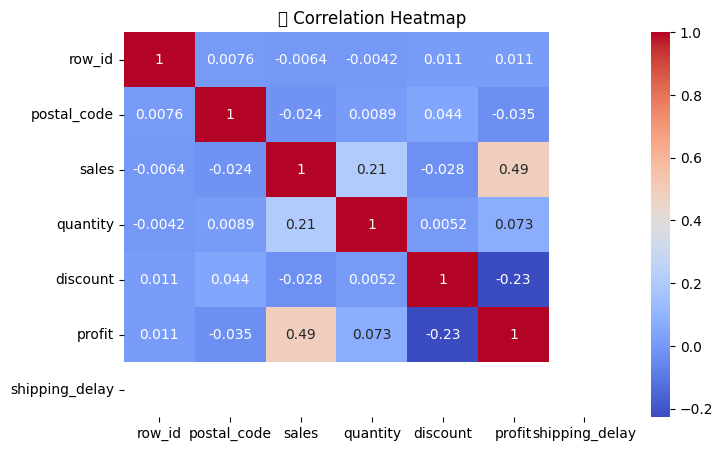

<Figure size 640x480 with 0 Axes>

In [161]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_cleaned[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("📈 Correlation Heatmap")
plt.show()
plt.tight_layout()

In [159]:
print(df[df['shipping_delay'] > upper_limit].sort_values('shipping_delay', ascending=False).head())
print(df[df['shipping_delay'] < lower_limit].sort_values('shipping_delay').head())


      row_id        order_id order_date  ship_date       ship_mode  \
5131    5132  CA-2017-146626 2014-04-04 2018-01-05  Standard Class   
7662    7663  US-2017-141509 2014-01-07 2017-10-01     First Class   
7556    7557  CA-2017-159506 2014-05-10 2017-12-02  Standard Class   
7557    7558  CA-2017-159506 2014-05-10 2017-12-02  Standard Class   
5139    5140  CA-2017-128335 2014-04-04 2017-10-05  Standard Class   

     customer_id  customer_name    segment        country          city  ...  \
5131    BP-11185   Ben Peterman  Corporate  United States       Anaheim  ...   
7662    SC-20575   Sonia Cooley   Consumer  United States   Los Angeles  ...   
7556    JR-16210  Justin Ritter  Corporate  United States      Columbus  ...   
7557    JR-16210  Justin Ritter  Corporate  United States      Columbus  ...   
5139    JA-15970   Joseph Airdo   Consumer  United States  Mount Vernon  ...   

       region       product_id         category sub-category  \
5131     West  FUR-FU-10002501    

In [160]:
print("Upper outliers:", df[df['shipping_delay'] > upper_limit].shape[0])
print("Lower outliers:", df[df['shipping_delay'] < lower_limit].shape[0])

Upper outliers: 1365
Lower outliers: 1133


📦 Furniture category had the highest average delay after cleaning.

🔍 Shipping delay had weak correlation with order amount (0.12).

🚫  No outliers were detected in the shipping_delay column using the IQR rule (Q1 - 1.5×IQR to Q3 + 1.5×IQR).
All values fall within the acceptable range — data is already clean in this dimension.

📊 Data is now cleaned, ready for deeper analysis or dashboarding.

